Image Processing

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Some Notes about the images
- IMG0000025.jpg shows a radius fracture at the wrist

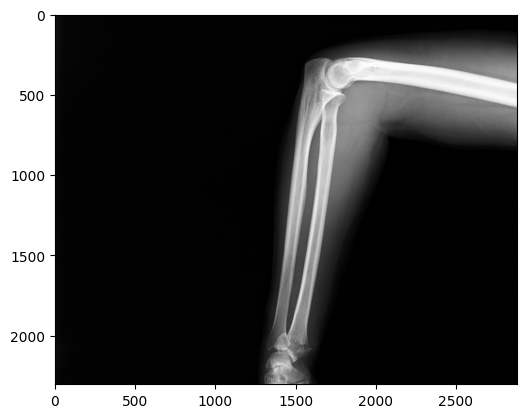

In [4]:
img = cv2.imread('FracAtlas/Images/Fractured/IMG0000025.jpg', cv2.IMREAD_GRAYSCALE)  # load as grayscale
plt.imshow(img, cmap='gray')

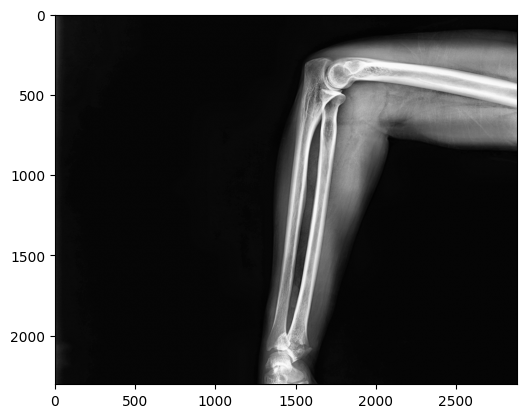

In [5]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(16, 16))
equalized_img = clahe.apply(img)
plt.imshow(equalized_img, cmap='gray')

### Fourier Transform Method

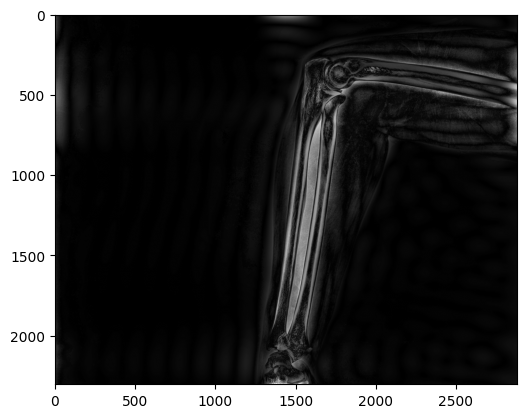

In [6]:
# Fourier Transform method
f_img = np.fft.fft2(equalized_img)
f_img = np.fft.fftshift(f_img)


# high pass mask
rows, cols = img.shape
mid_idx_row = rows // 2
mid_idx_col = cols // 2
r = 10 # radius of low frequencies to block
mask = np.ones((rows, cols), dtype=np.uint8)
mask[mid_idx_row - r:mid_idx_row + r, mid_idx_col - r:mid_idx_col + r] = 0

# apply the filter by multiplying in frequency domain
f_img_filtered = f_img * mask
img_result = np.fft.ifftshift(f_img_filtered)
img_result = np.abs(np.fft.ifft2(img_result))
img_result = np.uint8(img_result)

plt.imshow(img_result, cmap='gray')

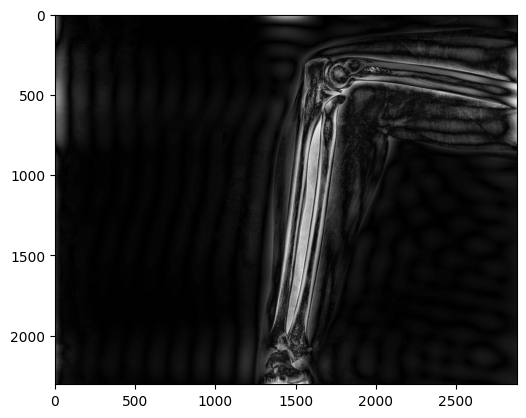

In [7]:
# apply clahe again (post HPF processing)
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(16, 16))
img_result_processed = clahe.apply(img_result)
plt.imshow(img_result_processed, cmap='gray')

## Built in CV2 method

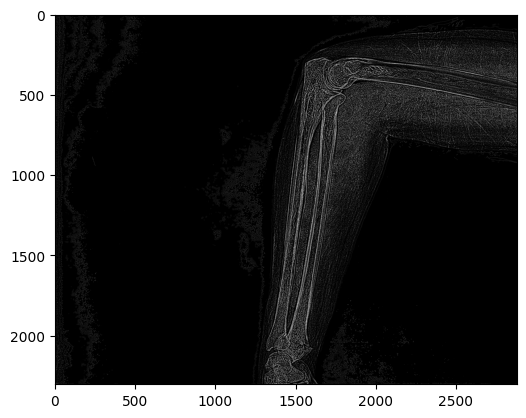

In [8]:
blurred_img = cv2.GaussianBlur(equalized_img, (21, 21), 3) 
high_pass_img = cv2.subtract(equalized_img, blurred_img) * 20


plt.imshow(high_pass_img, cmap='gray')